In [1]:
import requests
import pandas as pd
import os
import urllib3
import numpy as np
from time import sleep

# 가로수 데이터

In [12]:
api_name = "GeoInfoOfRoadsideTreeW"
gu_name = "중구"
api_key = "48546e6c6f786f6638364c614b6259"
url_format = 'http://openAPI.seoul.go.kr:8088/{api_key}/json/{api_name}/{start_index}/{end_index}/{gu_name}'
headers = {'content-type': 'application/json;charset=utf-8'}
columnList = ["GU_NO","GU_NM","OBJECTID","LC","X","Y","TRE_SOM","TRE_IDN","WDPT_NM","THT_HG","ITM_ERY","BHT_DM","WTRTB_BT","EXT_YNO","CMFE_LU_STTN","WIDTH_NM","ROAD_LT","EVMT_IFNE"]    
url1 = url_format.format(api_name=api_name, api_key=api_key, start_index=1, end_index=5, gu_name=gu_name)
url2 = url_format.format(api_name=api_name, api_key=api_key, start_index=5, end_index=10, gu_name=gu_name)
response1 = requests.get(url1, headers=headers)
response2 = requests.get(url2, headers=headers)

In [13]:
max_index = response1.json()[api_name]["list_total_count"]
print(max_index)

7745


In [35]:
status = response.json()[api_name]["RESULT"]["CODE"]
status

'INFO-000'

종로구 없음.....

In [18]:
#http://openAPI.seoul.go.kr:8088/(인증키)/xml/GeoInfoRoadsideTree/1/5/중구


def get_RoadT(api_names):
    
    api_name = api_names
    gu_list = ["강남구", "강동구", "강북구", "강서구", "관악구", "광진구", "구로구", "금천구", "노원구", "도봉구", "동대문구", "동작구", "마포구", "서대문구", "서초구", "성동구", "성북구", "송파구", "양천구", "영등포구", "용산구", "은평구", "중구", "중랑구"]
    api_key = "48546e6c6f786f6638364c614b6259"
    url_format = 'http://openAPI.seoul.go.kr:8088/{api_key}/json/{api_name}/{start_index}/{end_index}/{gu_name}'
    headers = {'content-type': 'application/json;charset=utf-8'}
        
    columnList = ["GU_NO","GU_NM","OBJECTID","LC","LAT","LNG","TRE_SOM","TRE_IDN","WDPT_NM","THT_HG","ITM_ERY","BHT_DM","WTRTB_BT","EXT_YNO","CMFE_LU_STTN","WIDTH_NM","ROAD_LT","EVMT_IFNE"]
    result = pd.DataFrame()

    for gu in gu_list:
        url = url_format.format(api_name=api_name, api_key=api_key, start_index=1, end_index=10, gu_name=gu)
        response = requests.get(url, headers=headers)
        max_index = response.json()[api_name]["list_total_count"]
        tb_num = 1
        
        for i in range(1,max_index+1,999):
            url = url_format.format(api_name=api_name, api_key=api_key, start_index=i, end_index=i+999, gu_name=gu)
            response = requests.get(url, headers=headers)
            current_dataf = pd.DataFrame(response.json()[api_name]["row"])
            current_dataf = current_dataf[columnList]
            result = pd.concat([result,current_dataf])
            current_dataf.to_csv("./raw_data/%s.csv" % (str(gu)+"_"+str(tb_num)), index=False, encoding='ms949')
            tb_num = tb_num+1
            sleep(0.5)
            
    result.to_csv("./raw_data/%s.csv" % ("road_tree"), index=False, encoding='ms949')

# 사유지 수목 데이터

In [24]:
#http://openapi.seoul.go.kr:8088/4957716d7362726133344a6e564b6b/json/GeoInfoParkAndPrivateLand/1/5

api_name = "GeoInfoParkAndPrivateLandWGS"

def get_PrivateT(api_names):
    
    api_name = api_names
    
    api_key = "48546e6c6f786f6638364c614b6259"
    url_format = 'http://openAPI.seoul.go.kr:8088/{api_key}/json/{api_name}/{start_index}/{end_index}'
    headers = {'content-type': 'application/json;charset=utf-8'}
        
    columnList = ["GU_NO","GU_NM","DONG_NM","OBJECTID","LC","LAT","LNG","TRE_IDN","SCNCENM_NM","WDPT_NM","THT_HG","ITM_ERY","VTN_ERY","BHT_DM","WTRTB_BT","CMFE_LU_ST","ITM_TYPE","TRE_SOM"]
    result = pd.DataFrame()

    url = url_format.format(api_name=api_name, api_key=api_key, start_index=1, end_index=10)
    response = requests.get(url, headers=headers)
    max_index = response.json()[api_name]["list_total_count"]
        
    for i in range(1,max_index+1,999):
        url = url_format.format(api_name=api_name, api_key=api_key, start_index=i, end_index=i+999)
        response = requests.get(url, headers=headers)
        current_dataf = pd.DataFrame(response.json()[api_name]["row"])
        current_dataf = current_dataf[columnList]
        result = pd.concat([result,current_dataf])

        sleep(0.5)
            
    result.to_csv("./raw_data/%s.csv" % ("private_tree"), index=False, encoding='ms949')

In [25]:
get_PrivateT("GeoInfoParkAndPrivateLandWGS")

## 합치기 + 전처리

In [29]:
test = pd.read_csv("submission.csv")

In [30]:
test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [60]:
tree1 = pd.read_csv("road_tree.csv", encoding="cp949", engine="python")

In [35]:
tree1.head(1)

,GU_NO,GU_NM,OBJECTID,LC,LAT,LNG,TRE_SOM,TRE_IDN,WDPT_NM,THT_HG,ITM_ERY,BHT_DM,WTRTB_BT,EXT_YNO,CMFE_LU_STTN,WIDTH_NM,ROAD_LT,EVMT_IFNE
0,23,강남구,187224.0,미성2차 아파트,37.5228949,127.020205,8,23-가-압구정로-0421,회화나무,8.0,8.0,15.0,5.0,0,0,압구정로,3100.0,0.0


In [ ]:
["구명","위도","경도","수목명","품계수종","수고","품계활력","흉고지름","수관너비"]

In [61]:
tree1 = tree1[['GU_NM','LAT',"LNG","WDPT_NM","TRE_SOM","THT_HG","ITM_ERY","BHT_DM","WTRTB_BT"]]

In [62]:
tree1.head()

,GU_NM,LAT,LNG,WDPT_NM,TRE_SOM,THT_HG,ITM_ERY,BHT_DM,WTRTB_BT
0,강남구,37.5228949,127.020205,회화나무,8,8.0,8.0,15.0,5.0
1,강남구,37.5148693,127.0522098,양버즘나무,4,15.0,8.0,34.0,8.0
2,강남구,37.4956663,127.053311,양버즘나무,4,12.0,8.0,31.0,7.0
3,강남구,37.493831,127.0637144,은행나무,8,8.0,8.0,15.0,4.0
4,강남구,37.4654955,127.0991176,느티나무,8,14.0,8.0,33.0,9.0


In [34]:
tree2 = pd.read_csv("private_tree.csv", encoding="cp949", engine="python")

In [40]:
tree2.head(1)

,GU_NO,GU_NM,DONG_NM,OBJECTID,LC,LAT,LNG,TRE_IDN,SCNCENM_NM,WDPT_NM,THT_HG,ITM_ERY,VTN_ERY,BHT_DM,WTRTB_BT,CMFE_LU_ST,ITM_TYPE,TRE_SOM
0,1,종로구,삼청동,1.0,28-6,37.586715,126.985058,1-삼청-큰-250,,벚나무,6.0,10.0,0.0,38.0,4.0,30,6.0,6


In [64]:
tree2 = tree2[['GU_NM',"LAT","LNG","WDPT_NM","TRE_SOM","THT_HG","ITM_ERY","BHT_DM","WTRTB_BT"]]

In [65]:
tree2.head()

,GU_NM,LAT,LNG,WDPT_NM,TRE_SOM,THT_HG,ITM_ERY,BHT_DM,WTRTB_BT
0,종로구,37.586715,126.985058,벚나무,6,6.0,10.0,38.0,4.0
1,종로구,37.585923,126.982346,은행나무,6,7.0,10.0,38.0,4.0
2,종로구,37.570231,126.965509,가래나무,6,12.0,10.0,38.0,6.0
3,종로구,37.576193,126.960128,벚나무,6,6.0,10.0,32.0,4.0
4,종로구,37.583341,126.972655,은행나무,6,12.0,10.0,32.0,2.0


In [68]:
len(tree1),len(tree2)

(257481, 178568)

In [297]:
total_tree = pd.concat([tree1,tree2])

In [298]:
total_tree.head(1)

,GU_NM,LAT,LNG,WDPT_NM,TRE_SOM,THT_HG,ITM_ERY,BHT_DM,WTRTB_BT
0,강남구,37.5228949,127.020205,회화나무,8,8.0,8.0,15.0,5.0


In [299]:
total_tree.rename(columns={"GU_NM":"구명", "LAT":"위도", "LNG":"경도", "WDPT_NM":"수목명", "TRE_SOM":"품계수종",
                           "THT_HG":"수고", "ITM_ERY":"품계활력", "BHT_DM":"흉고지름", "WTRTB_BT":"수관너비"}, inplace=True)

In [80]:
total_tree.head(1)

,구명,위도,경도,수목명,품계수종,수고,품계활력,흉고지름,수관너비
0,강남구,37.5228949,127.020205,회화나무,8,8.0,8.0,15.0,5.0


In [300]:
total_tree.sort_values(by="구명", inplace=True)

In [301]:
len(total_tree)

436049

In [306]:
total_tree['위도'] = pd.to_numeric(total_tree['위도'], errors='coerce')
total_tree['경도'] = pd.to_numeric(total_tree['경도'], errors='coerce')
total_tree['품계수종'] = pd.to_numeric(total_tree['품계수종'], errors='coerce')
total_tree['수고'] = pd.to_numeric(total_tree['수고'], errors='coerce')
total_tree['품계활력'] = pd.to_numeric(total_tree['품계활력'], errors='coerce')
total_tree['흉고지름'] = pd.to_numeric(total_tree['흉고지름'], errors='coerce')
total_tree['수관너비'] = pd.to_numeric(total_tree['수관너비'], errors='coerce')

In [323]:
total_tree.dropna(subset=["위도","경도"], inplace=True)

In [324]:
total_tree = total_tree.reset_index().drop("index",axis=1)

In [325]:
total_tree

,구명,위도,경도,수목명,품계수종,수고,품계활력,흉고지름,수관너비
0,강남구,37.522895,127.020205,회화나무,8.0,8.0,8.0,15.0,5.0
1,강남구,37.489393,127.057976,느티나무,6.0,7.0,15.0,29.0,8.0
2,강남구,37.492149,127.064744,버즘나무,6.0,12.0,15.0,30.0,8.0
3,강남구,37.524812,127.020405,왕벚나무,6.0,6.0,15.0,21.0,7.0
4,강남구,37.478395,127.056869,메타세쿼이아,2.0,17.0,15.0,38.0,8.0
5,강남구,37.481801,127.058749,은행나무,6.0,14.0,15.0,32.0,10.0
6,강남구,37.468257,127.100703,버즘나무,6.0,8.0,15.0,25.0,3.0
7,강남구,37.495704,127.059554,은행나무,6.0,13.0,15.0,31.0,10.0
8,강남구,37.478097,127.060567,메타세쿼이아,2.0,17.0,15.0,32.0,6.0
9,강남구,37.518831,127.056630,은행나무,6.0,11.0,15.0,30.0,6.0


In [803]:
len(set(total_tree["수목명"]))

202

In [798]:
set(total_tree["수목명"])

{' ',
 '가래나무',
 '가문비나무',
 '가시나무',
 '가이즈까향나무',
 '가죽나무',
 '갈매나무',
 '갈참나무',
 '감나무',
 '개쉬땅나무',
 '개암나무',
 '개오동나무',
 '개잎갈나무',
 '거제수나무',
 '결주',
 '겹벚나무',
 '계수나무',
 '고로쇠나무',
 '고무나무',
 '고사',
 '고욤나무',
 '곰솔나무',
 '괴불나무',
 '구상나무',
 '굴참나무',
 '귀룽나무',
 '꽃개오동',
 '꽃사과',
 '나무수국',
 '낙우송',
 '너도밤나무',
 '네군도단풍',
 '노간주나무',
 '눈잣나무',
 '눈주목',
 '눈향나무',
 '느릅나무',
 '느티나무',
 '능금나무',
 '능소화',
 '능수버들',
 '닥나무',
 '단풍나무',
 '단풍버즘나무',
 '당단풍나무',
 '대왕참나무',
 '대추나무',
 '독일가문비',
 '돌배나무',
 '동백나무',
 '두릅나무',
 '두충나무',
 '들메나무',
 '등나무',
 '때죽나무',
 '떡갈나무',
 '라일락',
 '루브라참나무',
 '리기다소나무',
 '마로니에',
 '말채나무',
 '매실나무',
 '매화나무',
 '메타세쿼이아',
 '명자나무',
 '모감주나무',
 '모과나무',
 '목련',
 '무궁화',
 '무화과',
 '물박달나무',
 '물오리나무',
 '물푸레나무',
 '미루나무',
 '밤나무',
 '방크스소나무',
 '배나무',
 '배롱나무',
 '백목련',
 '백송',
 '백일홍',
 '버드나무',
 '버즘나무',
 '벚나무',
 '벽오동',
 '별목련',
 '보리수나무',
 '보호수',
 '복나무',
 '복숭아나무',
 '복자기',
 '복자기나무',
 '분비나무',
 '붉나무',
 '비목나무',
 '비술나무',
 '비자나무',
 '뽕나무',
 '사과나무',
 '사시나무',
 '사철나무',
 '산딸나무',
 '산벚나무',
 '산뽕나무',
 '산사나무',
 '산수유',
 '살구나무',
 '삼나무',
 '상수리나무',
 '생강나무',
 '서양측백',
 '서

In [569]:
len(total_tree[total_tree['수목명']==' '])

64958

In [799]:
total_tree[total_tree["수목명"] == "고사"]

,구명,위도,경도,수목명,품계수종,수고,품계활력,흉고지름,수관너비
230680,마포구,37.565544,126.898977,고사,0.0,6.0,0.0,0.0,4.0
230869,마포구,37.575823,126.883709,고사,0.0,0.0,0.0,0.0,0.0
231179,마포구,37.569067,126.891500,고사,8.0,4.0,6.0,13.0,3.0
242271,마포구,37.569420,126.891576,고사,0.0,4.0,0.0,13.0,3.0


In [794]:
for i in total_tree[total_tree['수목명']=='노향나무'].iterrows():
#     print(i[0])
    total_tree.loc[i[0],'수목명'] = "향나무"

수목명까지 전처리 완료.....

In [3]:
total_tree.head()

,구명,위도,경도,수목명,품계수종,수고,품계활력,흉고지름,수관너비
0,강남구,37.522895,127.020205,회화나무,8.0,8.0,8.0,15.0,5.0
1,강남구,37.489393,127.057976,느티나무,6.0,7.0,15.0,29.0,8.0
2,강남구,37.492149,127.064744,버즘나무,6.0,12.0,15.0,30.0,8.0
3,강남구,37.524812,127.020405,왕벚나무,6.0,6.0,15.0,21.0,7.0
4,강남구,37.478395,127.056869,메타세쿼이아,2.0,17.0,15.0,38.0,8.0


In [12]:
total_tree["수목명"].value_counts()

은행나무       141917
양버즘나무       80581
            64958
느티나무        39963
버즘나무        21487
메타세쿼이아      12444
벚나무         11319
소나무          8845
왕벚나무         8036
회화나무         5894
이팝나무         2649
중국단풍         2401
아카시아나무       2238
튤립나무         2234
단풍나무         2173
은단풍          1876
가죽나무         1737
버드나무         1668
목련           1640
칠엽수          1624
감나무          1542
향나무          1469
오동나무         1259
이태리포플러       1051
은백양           988
현사시나무         830
상수리나무         814
측백나무          685
수양버들          506
스트로브잣나무       478
            ...  
모감주나무           2
회나무             1
쥐똥나무            1
비목나무            1
곰솔나무            1
양버들             1
좁은단풍            1
나무수국            1
물박달나무           1
수국              1
거제수나무           1
복나무             1
갈매나무            1
붉나무             1
탱자나무            1
눈잣나무            1
고무나무            1
개쉬땅나무           1
분비나무            1
풍단              1
우산고로쇠           1
괴불나무            1
노간주나무           1
장미              1
명자나무      

#### Issues
- NA 값 어떻게 처리할 것인가
- rare한 값들은 어떻게 처리할 것인가

품계수종
- 품계수종은 어쩌피 수목명에 기반한 것이기 때문에 필요 없다....?

In [20]:
sum(total_tree["품계수종"].isna())

4924

In [15]:
total_tree["품계수종"].value_counts().sort_index()

0.0      27704
1.0       7822
2.0      43764
3.0      17640
4.0     116951
6.0      88776
8.0     128417
21.0         1
66.0         1
Name: 품계수종, dtype: int64

수고

In [22]:
sum(total_tree["수고"].isna())

0

In [29]:
sum(round(total_tree["수고"]) != total_tree["수고"])

470

In [31]:
total_tree["수고"].value_counts().sort_index()

0.0        3629
1.0         172
2.0         632
2.5           5
3.0        3857
3.5         321
4.0       16480
4.5         112
5.0       24880
5.5          32
6.0       52710
7.0       68892
8.0       70184
9.0       42539
10.0      51900
11.0      23585
12.0      32685
13.0      11572
14.0       8184
15.0       9135
16.0       3681
17.0       3616
18.0       2387
19.0        736
20.0       1566
21.0        264
22.0        465
23.0        352
24.0        291
25.0        343
          ...  
75.0          2
77.0          2
78.0          4
85.0          3
89.0          1
91.0          1
93.0          1
98.0          2
99.0          2
101.0         1
106.0         1
110.0         1
111.0         1
112.0         3
120.0         1
121.0         1
122.0         1
125.0         1
127.0         2
133.0         1
138.0         1
148.0         1
169.0         1
191.0         1
635.0         4
811.0         1
910.0         1
1211.0        1
1313.0        1
1911.0        1
Name: 수고, Length: 95, dt

품계활력
- Condition 추가

In [27]:
sum(total_tree["품계활력"].isna())

0

In [28]:
total_tree["품계활력"].value_counts().sort_index()

0.0       32732
1.0         185
2.0       21727
3.0       27300
4.0       14511
5.0         593
6.0      141555
8.0       85949
9.0         610
10.0      34998
15.0      75839
105.0         1
Name: 품계활력, dtype: int64

In [58]:
sum(total_tree["품계활력"] <= 5)

97048

In [66]:
sum((total_tree["품계활력"] > 5) & (total_tree["품계활력"] < 10))

228114

In [64]:
sum((total_tree["품계활력"]) >= 10)

110838

In [46]:
total_tree["Condition"] = " "

In [75]:
total_tree["Condition"].value_counts().sort_index()

Excellent    110838
Fair         228114
Poor          97048
Name: Condition, dtype: int64

In [50]:
for i in total_tree[total_tree['품계활력'] <= 5].iterrows():
#     print(i[1])
    total_tree.loc[i[0],'Condition'] = "Poor"

In [ ]:
for i in total_tree[(total_tree["품계활력"] > 5) & (total_tree["품계활력"] < 10)].iterrows():
#     print(i[1])
    total_tree.loc[i[0],'Condition'] = "Fair"

In [71]:
for i in total_tree[total_tree["품계활력"] >= 10].iterrows():
#     print(i[1])
    total_tree.loc[i[0],'Condition'] = "Excellent"

In [78]:
total_tree.head()

,구명,위도,경도,수목명,품계수종,수고,품계활력,흉고지름,수관너비,Condition
0,강남구,37.522895,127.020205,회화나무,8.0,8.0,8,15.0,5,Fair
1,강남구,37.489393,127.057976,느티나무,6.0,7.0,15,29.0,8,Excellent
2,강남구,37.492149,127.064744,버즘나무,6.0,12.0,15,30.0,8,Excellent
3,강남구,37.524812,127.020405,왕벚나무,6.0,6.0,15,21.0,7,Excellent
4,강남구,37.478395,127.056869,메타세쿼이아,2.0,17.0,15,38.0,8,Excellent


흉고지름

In [76]:
sum(total_tree["흉고지름"].isna())

0

In [32]:
sum(round(total_tree["흉고지름"]) != total_tree["흉고지름"])

1

In [19]:
total_tree["흉고지름"].value_counts().sort_index()

0.0        8838
1.0          10
2.0          28
3.0          74
4.0         130
5.0         391
6.0        1277
7.0        1372
8.0        4283
9.0        2858
10.0      12034
11.0       5958
12.0      12581
13.0       9136
14.0       9962
15.0      12428
16.0      11411
17.0       8682
18.0      12824
19.0       6512
20.0      45384
21.0      18124
22.0      24933
23.0      18961
24.0      21991
25.0      29631
26.0      16372
27.0      12414
28.0      18122
29.0      12575
          ...  
184.0         1
189.0         1
195.0         1
199.0         1
200.0         7
202.0         3
210.0         1
215.0         1
220.0         2
221.0         2
224.0         2
228.0         1
230.0         3
231.0         1
232.0         2
240.0         1
247.0         2
250.0         2
252.0         1
269.0         1
280.0         1
282.0         1
314.0         1
333.0         1
360.0         2
401.0         1
410.0         1
1707.0        1
2326.0        1
4030.0        1
Name: 흉고지름, Length: 176,

In [9]:
sum(total_tree["수관너비"].isna())

0

In [33]:
sum(round(total_tree["수관너비"]) != total_tree["수관너비"])

0

In [20]:
total_tree["수관너비"].value_counts().sort_index()

0.0       4848
1.0      12483
2.0      41065
3.0      83256
4.0      95059
5.0      65322
6.0      58711
7.0      28462
8.0      24460
9.0       6707
10.0      8233
11.0      1645
12.0      3111
13.0       780
14.0       510
15.0       625
16.0       248
17.0        61
18.0       137
19.0        12
20.0       107
21.0         9
22.0        22
23.0         7
24.0        20
25.0         2
26.0        13
27.0         1
28.0        16
30.0        13
31.0         1
32.0         6
33.0         9
34.0         3
35.0         1
36.0         1
37.0         1
38.0         2
40.0         4
43.0         1
44.0         3
45.0         6
47.0         1
55.0         6
66.0         3
67.0         1
70.0         1
76.0         1
79.0         1
87.0         1
88.0         1
415.0        1
Name: 수관너비, dtype: int64

In [79]:
total_tree.to_csv("./raw_data/%s.csv" % ("total_tree"), index=False, encoding='ms949')

# 데이터정리

수목명 / 흉고지름 / Condition 
- 중복값 제거

In [1]:
import pandas as pd

In [2]:
total_tree = pd.read_csv("./raw_data/total_tree.csv", encoding="cp949", engine="python")

In [3]:
Itrees = total_tree[["수목명","흉고지름","Condition"]]

In [17]:
Itrees[["수목명","Condition"]].drop_duplicates()

,수목명,Condition
0,회화나무,Fair
1,느티나무,Excellent
2,버즘나무,Excellent
3,왕벚나무,Excellent
4,메타세쿼이아,Excellent
5,은행나무,Excellent
15,소나무,Excellent
22,목련,Excellent
23,참나무,Excellent
27,상수리나무,Excellent


In [86]:
len(Itrees)

436000

In [88]:
Itrees.drop_duplicates()

,수목명,흉고지름,Condition
0,회화나무,15.0,Fair
1,느티나무,29.0,Excellent
2,버즘나무,30.0,Excellent
3,왕벚나무,21.0,Excellent
4,메타세쿼이아,38.0,Excellent
5,은행나무,32.0,Excellent
6,버즘나무,25.0,Excellent
7,은행나무,31.0,Excellent
8,메타세쿼이아,32.0,Excellent
9,은행나무,30.0,Excellent


### 데이터에 포함된 나무 품종 (수종) 통계

In [110]:
dataR = pd.read_csv("\\Users\\brand\\treeData\\raw_data\\road_tree.csv", engine='python', encoding ='cp949')
dataP = pd.read_csv("\\Users\\brand\\treeData\\raw_data\\private_tree.csv", engine='python', encoding ='cp949')
dataR_raw = dataR.copy()
dataP_raw = dataP.copy()

In [106]:
dataR

,GU_NO,GU_NM,OBJECTID,LC,X,Y,TRE_SOM,TRE_IDN,WDPT_NM,THT_HG,ITM_ERY,BHT_DM,WTRTB_BT,EXT_YNO,CMFE_LU_STTN,WIDTH_NM,ROAD_LT,EVMT_IFNE
0,23.0,강남구,230000015.0,미성2차 아파트,201786.092,447045.360,8,23-가-압구정로-0421,회화나무,8.0,8.0,15.0,5.0,0,0.0,압구정로,3100.0,0.0
1,23.0,강남구,230000016.0,강남우체국,202957.466,446132.147,8,23-가-학동로-0436,느티나무,4.0,8.0,11.0,3.0,0,0.0,학동로,3200.0,0.0
2,23.0,강남구,230000017.0,구정고교,202983.546,447895.530,8,23-가-언주로-0752,버즘나무,8.0,8.0,20.0,4.0,0,0.0,언주로,4400.0,0.0
3,23.0,강남구,230000018.0,개포2차 우성아파트,205049.353,443566.441,4,23-가-남부순환로-0770,양버즘나무,8.0,8.0,14.0,6.0,0,0.0,남부순환로,6300.0,0.0
4,23.0,강남구,230000020.0,개포주공아파트 4단지,206064.463,442779.641,8,23-가-삼성로-0023,은행나무,9.0,8.0,16.0,5.0,0,0.0,삼성로,3600.0,0.0
5,23.0,강남구,230000021.0,미성2차 아파트,201760.899,447056.294,8,23-가-압구정로-0406,회화나무,7.0,8.0,21.0,7.0,0,0.0,압구정로,3100.0,0.0
6,23.0,강남구,230000022.0,강남공고,207482.852,442440.418,4,23-가-대모산길-0188,양버즘나무,7.0,8.0,10.0,3.0,0,0.0,대모산길,840.0,0.0
7,23.0,강남구,230000023.0,대하빌딩,203465.879,445482.089,4,23-가-봉은사로-0605,양버즘나무,12.0,8.0,30.0,8.0,0,0.0,봉은사로,3800.0,0.0
8,23.0,강남구,230000024.0,대치사거리,205050.338,444802.370,8,23-가-역삼로-0113,버즘나무,9.0,8.0,30.0,5.0,0,0.0,역삼로,3200.0,0.0
9,23.0,강남구,230000025.0,삼릉공원,203960.972,445467.975,8,23-가-선릉로-0314,은행나무,9.0,8.0,17.0,6.0,0,0.0,선릉로,4750.0,0.0


In [108]:
dataP

,GU_NO,GU_NM,DONG_NM,OBJECTID,LC,X,Y,TRE_IDN,SCNCENM_NM,WDPT_NM,THT_HG,ITM_ERY,VTN_ERY,BHT_DM,WTRTB_BT,CMFE_LU_STTN,ITM_TYPE,TRE_SOM
0,1.0,종로구,숭인동,10000058.0,58,201602.247,201602.2466,1-숭인1-큰-4,NaN,은행나무,9.0,10.0,0.0,30.0,3.0,5051.0,6.0,6
1,1.0,종로구,숭인동,10000059.0,20-159,201343.330,201343.3296,1-숭인1-큰-53,NaN,튤립나무,10.0,10.0,0.0,48.0,4.0,30.0,6.0,2
2,1.0,종로구,혜화동,10000061.0,90-1,200352.734,200352.7337,1-헤화-큰-279,NaN,칠엽수,9.0,10.0,0.0,35.0,4.0,30.0,6.0,2
3,1.0,종로구,명륜동,10000062.0,53,199569.836,199569.8359,1-명륜3-큰-102,NaN,은행나무,6.0,10.0,0.0,28.0,1.0,30.0,6.0,6
4,1.0,종로구,명륜동,10000063.0,53-2,199625.488,199625.4881,1-명륜3-큰-119,NaN,오동나무,9.0,10.0,0.0,40.0,4.0,30.0,6.0,6
5,1.0,종로구,"종로5,6가동",10000064.0,1-24,200780.581,200780.5813,"1-종로5,6-큰-76",NaN,은행나무,13.0,10.0,0.0,40.0,3.0,30.0,6.0,6
6,1.0,종로구,"종로5,6가동",10000065.0,1-61,200838.898,200838.8980,"1-종로5,6-큰-102",NaN,상수리나무,8.0,10.0,0.0,38.0,4.0,5051.0,6.0,6
7,1.0,종로구,부암동,10000066.0,69-25,196617.441,196617.4415,1-부암동-큰-158,NaN,소나무,7.0,10.0,0.0,28.0,3.0,10.0,6.0,6
8,1.0,종로구,평창동,10000068.0,98,196275.043,196275.0434,1-평창동-큰-569,NaN,칠엽수,9.0,10.0,0.0,28.0,3.0,2120.0,6.0,2
9,1.0,종로구,종로1~4가동,10000069.0,38-1,198375.709,198375.7086,1-종로1~4-큰-322,NaN,느티나무,6.0,10.0,0.0,27.0,3.0,5051.0,6.0,6


In [109]:
#olds.rename({'소재지':'주소'},axis=1, inplace = True) 

In [122]:
dataR.WDPT_NM.value_counts()

은행나무                 109431
양버즘나무                 68830
느티나무                  22942
버즘나무                  17422
벚나무                    7206
왕벚나무                   6626
메타세쿼이아                 5296
회화나무                   4661
소나무                    2742
이팝나무                   2648
은단풍                    1228
감나무                     925
가중나무                    800
단풍나무                    537
칠엽수                     526
대왕참나무                   402
중국단풍                    379
메타세콰이어                  304
층층나무                    298
은단풍나무                   282
결주                      273
왕벗나무                    241
느릅나무                    233
목련                      230
수양버들                    222
살구나무                    219
튤립나무                    173
복자기나무                   131
스트로브잣나무                 117
산딸나무                    106
                      ...  
팽나무                       1
청단풍나무                     1
?                         1
무궁화나무                     1
은나무                 

In [123]:
dataP.WDPT_NM.value_counts()

은행나무                                         32428
느티나무                                         16998
양버즘나무                                        11650
메타세쿼이아                                        6446
소나무                                           5770
버즘나무                                          4067
벚나무                                           3872
중국단풍                                          1889
아까시나무                                         1642
단풍나무                                          1633
버드나무                                          1582
향나무                                           1467
목련                                            1409
튤립나무                                          1294
오동나무                                          1255
회화나무                                          1234
왕벚나무                                          1155
칠엽수                                           1073
이태리포플러                                        1006
은백양                            

In [113]:
dataR.WDPT_NM.unique() 

array(['회화나무', '느티나무', '버즘나무', '양버즘나무', '은행나무', '메타세쿼이아', '벚나무', '대왕참나무',
       '능수버들', '소나무', '이태리 포플러', '현사시', '수양버들', nan, '대추나무', '모과나무',
       '이팝나무', '감나무', '단풍나무', '물푸레나무', '매화나무', '은단풍', '배롱나무', '벽오동', '0',
       '세열단풍', '꽃사과', '벗나무', '양버즘', '×', '은단풍나무', '느릅나무', '스트로브잣나무',
       '은행나무 ', '?', '왕벚나무', '느티나', '11111111111111', '11111111111',
       '은행나', '11111111111111111', '111111', '아까시나무', '1111', '복자기나무',
       '칠엽수', '튤립나무', '가중나무', '계수나무', '백목련', ' ', ' 은행나무', '목련', '후박나무',
       '상수리나무', '수양벚나무', '버드나무', '향나무', '결주', '층층나무', '살구나무', '주목',
       '살구나무살구나무', '은사시나무', '수수꽃다리', '함박꽃나무', '미루나무', '청단풍나무', '자작나무',
       '당단풍나무', '목백합', '은헹나무', '포플러', '벚꽃나무', '무궁화나무', '중국단풍', '왕벗나무',
       '청단풍', '메타세콰이어', '므티나무', '메타세퀘이아', '중국단풍나무', '고사', '은해나무', '살구',
       '히말라야시다', '은나무', '풍단', '사철나무', '매타세콰이아', '오동나무', '때죽나무', '일본목련',
       '산딸나무', '홍단풍', '아카시아', '이태리포플러', '네군도단풍', '느티느티나무넘은들5길나무', '공분',
       '공분양버즘나무', '서어나무', '팽나무', '측백나무', '팥배나무', '포플러나무', '목백합나무', '산벚나무',


In [114]:
dataP.WDPT_NM.unique() 

array(['은행나무', '튤립나무', '칠엽수', '오동나무', '상수리나무', '소나무', '느티나무', '회화나무',
       '팥배나무', '갈참나무', '단풍나무', '양버즘나무', '향나무', '측백나무', '히말라야시다', '잣나무',
       '감나무', '아까시나무', '메타세쿼이아', '벚나무', '가래나무', '느릅나무', '버드나무', '목련',
       '쉬나무', '이태리포플러', '가중나무', '음나무', '낙우송', '편백', '구상나무', '밤나무', '반송',
       '화백', '백송', '피나무', '미루나무', '중국단풍', '대추나무', '전나무', '은사시나무', '개암나무',
       '주목', '팽나무', '호도나무', '독일가문비', '살구나무', '고욤나무', '자작나무', '모과나무',
       '섬잣나무', '뽕나무', '꽃사과', '수수꽃다리', '수양버들', '낙엽송', '꽃개오동', '아카시아나무',
       '백합나무', '호두나무', '계수나무', '신단풍', '참나무', '라일락', '벗나무', '사시나무', '목백합',
       '메타세콰이어', nan, '가이즈까향나무', '벽오동나무', '리기다소나무', '백일홍', '자귀나무',
       '보리수나무', '물푸레나무', '비술나무', '편백나무', '현사시나무', '등나무', '일본목련', '은향나무',
       '개잎갈나무', '잎갈나무', '쪽동백', '신단풍나무', '양버즘', '국참나무', '툴립나무', '떡갈나무',
       '젓나무', '양버들나무', '신갈나무', '후박나무', '은사시', '능수버들', '은단풍', '은행',
       '꽃사과나무', '실화백', '복숭아', '가이즈카향나무', '아태리포플러', '송송나무', '백목련', '실편백',
       '복숭아나무', '층층나무', '목련나무', '갈탕나무', '벽오동', '은백양', '굴참나무', '참오동',
       

In [118]:
!pip install missingno

  Using cached https://files.pythonhosted.org/packages/2b/de/6e4dd6d720c49939544352155dc06a08c9f7e4271aa631a559dfbeaaf9d4/missingno-0.4.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/be/cc/6f7842a4d9aa7f51155f849185631e1201df255742de84d724ac33bff723/scipy-1.3.0-cp37-cp37m-win32.whl
  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl


In [119]:
import missingno as mino

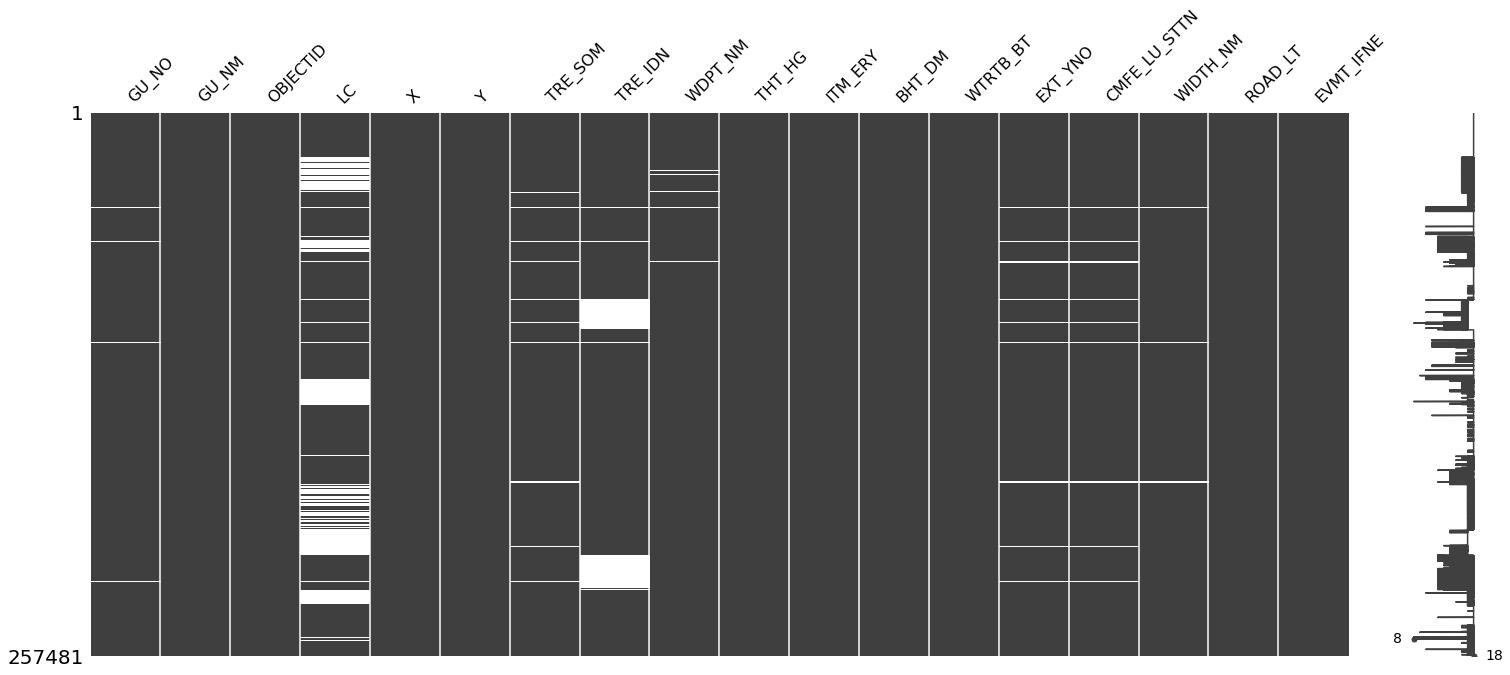

In [120]:
mino.matrix(dataR)

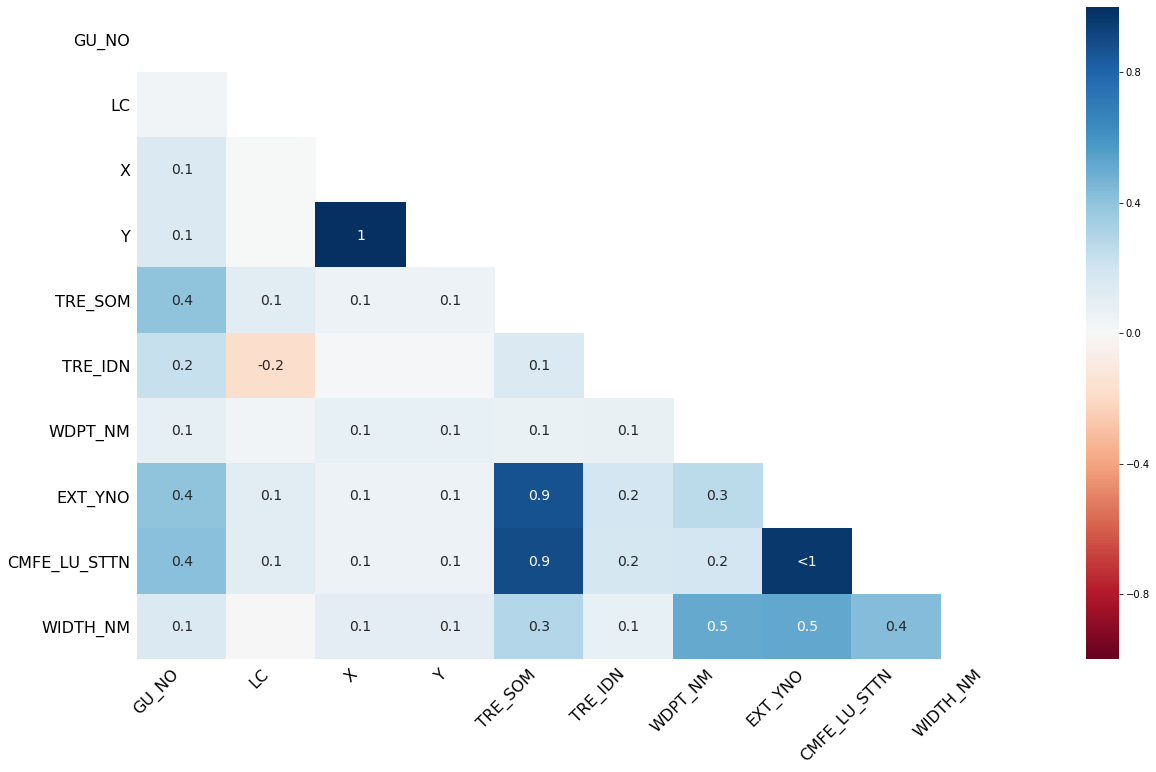

In [121]:
mino.heatmap(dataR)

In [11]:
!pip install xlrd

In [1]:
#Genus Name, Species Name, Family, Common Name, Species Code, Growth Form, Percent Leaf Type, Leaf Type, Growth Rate, Longevity, Height at Maturity (feet)

In [27]:
dataTree_US = pd.read_csv("\\Users\\brand\\treeData\\treeUS.csv", engine='python')

In [46]:
dataTree_US[["Common Name","Species Name","Genus Name"]]

,Common Name,Species Name,Genus Name
0,Abarema cochliocarpos,cochliocarpos,Abarema
1,Abarema glauca,glauca,Abarema
2,pau gamba,langsdorfii,Abarema
3,Abelia,chinensis,Abelia
4,Glossy abelia,x grandiflora,Abelia
5,Indian abelia,triflora,Abelia
6,European silver fir,alba,Abies
7,Pacific silver fir,amabilis,Abies
8,Balsam fir,balsamea,Abies
9,Bulgarian fir,x borisii-regis,Abies


In [53]:
tree_en_kr = pd.read_csv("\\Users\\brand\\treeData\\raw_data\\tree_kr_en.csv", engine='python')

In [54]:
tree_en_kr

,과국명,과명,이름,학명
0,가래나무과,Juglandaceae,굴피나무,Platycarya strobilacea
1,가래나무과,Juglandaceae,굴피나무,Platycarya strobilacea Siebold & Zucc
2,가래나무과,Juglandaceae,가래나무,Juglans Mandshurica Maxim. Var. mandshurica fo...
3,가래나무과,Juglandaceae,중국굴피,Pterocarya stenoptera DC.
4,가래나무과,Juglandaceae,피칸,Carya illinoensis
5,가래나무과,Juglandaceae,호두,Ferocactus acanthodes Br. ＆ R.
6,가래나무과,Juglandaceae,호두나무,Juglans sinensis
7,가지과,Solanaceae,구기자,Lycium chinense
8,가지과,Solanaceae,꽈리,Physalis wrightii Gray
9,갈매나무과,Rhamnaceae,갈매나무,Rhamnus davurica Pall.


In [61]:
a = tree_en_kr({'key':list(tree_en_kr["학명"]), 'name':list(tree_en_kr["이름"])})

TypeError: 'DataFrame' object is not callable

In [60]:
list(tree_en_kr["학명"])

['Platycarya strobilacea ',
 'Platycarya strobilacea Siebold & Zucc',
 'Juglans Mandshurica Maxim. Var. mandshurica for. Mandst',
 'Pterocarya stenoptera DC.',
 'Carya illinoensis',
 'Ferocactus acanthodes Br. ＆ R.',
 'Juglans sinensis ',
 'Lycium chinense',
 'Physalis wrightii Gray',
 'Rhamnus davurica Pall. ',
 'Zizyphus jujuba var. inermis',
 ' Berchemia racemosa var. magna Makino',
 'Hovenia dulcis Thunb. ex murray',
 'Diospyros kaki THUNB. ',
 'Diospyros lotus L.',
 'Diospyros rhombifolia',
 'Diospyros rhombifolia',
 'Diospyros kaki var',
 'Ilex crenata Thunb. ',
 'llex serrata Thunb.',
 'Ilex macropoda Miq',
 'llex chinensis',
 'Ilex cornuta LINDL',
 'Cercidiphyllum Japonicum S. et Z.',
 'Osmunda japonica',
 'Staphylea bumalda Dc',
 'Chrysanthemum zawadskii ',
 'Dendranthema indicum (L.) Des Moul.',
 'Chrysanthemum indicu',
 'Aster tataricus L.f',
 'Rudbeckia laciniata var. hortensis Bail.',
 'Cirsium setidens ',
 'Chrysanthemum zawadskii var. latilobum KITAMURA ',
 'Coreopsis la